# EBAC - Regressão II - regressão múltipla

## Tarefa II

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


%matplotlib inline

In [78]:
renda = pd.read_csv('previsao_de_renda.csv')

In [79]:
renda = renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [80]:
# separar a base em treinamento e teste (25% para teste, 75% para treinamento)

renda_train, renda_test = train_test_split(renda, test_size=0.25, random_state=100)

In [81]:
# base de treino com 75% das linhas
renda_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11250 entries, 1614 to 5640
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   11250 non-null  object 
 1   posse_de_veiculo       11250 non-null  bool   
 2   posse_de_imovel        11250 non-null  bool   
 3   qtd_filhos             11250 non-null  int64  
 4   tipo_renda             11250 non-null  object 
 5   educacao               11250 non-null  object 
 6   estado_civil           11250 non-null  object 
 7   tipo_residencia        11250 non-null  object 
 8   idade                  11250 non-null  int64  
 9   tempo_emprego          9327 non-null   float64
 10  qt_pessoas_residencia  11250 non-null  float64
 11  renda                  11250 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 988.8+ KB


In [82]:
# base de teste com 25% das linhas
renda_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 10155 to 4694
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   3750 non-null   object 
 1   posse_de_veiculo       3750 non-null   bool   
 2   posse_de_imovel        3750 non-null   bool   
 3   qtd_filhos             3750 non-null   int64  
 4   tipo_renda             3750 non-null   object 
 5   educacao               3750 non-null   object 
 6   estado_civil           3750 non-null   object 
 7   tipo_residencia        3750 non-null   object 
 8   idade                  3750 non-null   int64  
 9   tempo_emprego          3100 non-null   float64
 10  qt_pessoas_residencia  3750 non-null   float64
 11  renda                  3750 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 329.6+ KB


2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [83]:
# definição do modelo

modelo = '''renda ~ sexo 
                    + posse_de_veiculo 
                    + posse_de_imovel 
                    + qtd_filhos 
                    + tipo_renda 
                    + educacao 
                    + estado_civil 
                    + tipo_residencia 
                    + idade 
                    + tempo_emprego 
                    + qt_pessoas_residencia
                    '''

In [84]:
# regularização ridge

md_train = smf.ols(modelo, data=renda_train)

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1] # lista com alphas
rquadrado_test = [] # lista para adicionar o r-quadrado da base de testes com cada alpha

for alpha in alphas:
    reg = md_train.fit_regularized(method= 'elastic_net',
                                  refit=True,
                                  L1_wt=0,    # ridge
                                  alpha=alpha)
    renda_test['pred'] = reg.predict(renda_test)   # usar reg para prever renda na base de teste
    r = renda_test[['pred', 'renda']].corr().iloc[0,1]    # calcular r2 por meio da correlação (r)
    r2 = r ** 2
    rquadrado_test.append(r2)   # incluir valor de r2 na lista criada 
    
    
pd.DataFrame({'alpha': alphas, 'r_quadrado':rquadrado_test}).sort_values('r_quadrado')  

,alpha,r_quadrado
5,0.100,0.244909
4,0.050,0.251549
3,0.010,0.256093
0,0.000,0.256328
1,0.001,0.256360
2,0.005,0.256385


Entre os modelos de regressão com regularização ridge testados, o que obteve o melhor coeficiente de determinação foi aquele que utilizou um valor de alpha igual a 0.005, resultando em um r-quadrado de 0.256385.

3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [85]:
# regularização lasso

md_train = smf.ols(modelo, data=renda_train)

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1] # lista com alphas
rquadrado_test = [] # lista para adicionar o r-quadrado da base de testes com cada alpha

for alpha in alphas:
    reg = md_train.fit_regularized(method= 'elastic_net',
                                  refit=True,
                                  L1_wt=1,    # lasso
                                  alpha=alpha)
    renda_test['pred'] = reg.predict(renda_test)   # usar reg para prever renda na base de teste
    r = renda_test[['pred', 'renda']].corr().iloc[0,1]    # calcular r2 por meio da correlação (r)
    r2 = r ** 2
    rquadrado_test.append(r2)   # incluir valor de r2 na lista criada 
    
    
pd.DataFrame({'alpha': alphas, 'r_quadrado':rquadrado_test}).sort_values('r_quadrado')  

,alpha,r_quadrado
5,0.100,0.256327
0,0.000,0.256328
1,0.001,0.256328
2,0.005,0.256328
3,0.010,0.256328
4,0.050,0.256328


Os modelos de regressão com regularização lasso testados apresentaram valores de r-quadrado muito parecidos. O que utilizou um valor de alpha igual a 0.100 resultou em um r-quadrado de 0.256327 e todos os outros o r-quadrado foi de 0.256328. 
As duas regularizações (lasso e ridge) foram muito parecidas, não parece ter diferença significativa.

4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?

In [86]:
# transformando variáveis categóricas em dummies

renda_dummies = pd.get_dummies(data=renda.dropna(), drop_first=True).astype(int)
renda_dummies.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,1,0,26,6,1,8060,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,1,0,28,7,2,1852,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,35,0,2,2253,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,30,4,3,6600,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,33,4,1,6475,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [87]:
# separar a base em treinamento e teste (25% para teste, 75% para treinamento)

renda_dummies_train, renda_dummies_test = train_test_split(renda_dummies, test_size=0.25, random_state=100)

In [88]:
X = renda_dummies_train.drop('renda', axis=1)
y = renda_dummies_train.renda


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_M                         with p-value 4.78748e-248
#############
['tempo_emprego', 'sexo_M']
Add  idade                          with p-value 4.60408e-06
#############
['tempo_emprego', 'sexo_M', 'idade']
Add  tipo_renda_Empresário          with p-value 2.95103e-05
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário']
Add  educacao_Superior completo     with p-value 0.00919412
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']
resulting features:
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']


In [128]:
# definição dos df com as variáveis definidas pelo stepwise para base de treinamento

X_train = renda_dummies_train[variaveis]
y_train = renda_dummies_train['renda']

df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,tempo_emprego,sexo_M,idade,tipo_renda_Empresário,educacao_Superior completo,renda
3889,3,1,50,0,0,1338
14483,2,0,52,0,1,20103
762,6,0,38,0,0,839
3078,7,0,27,1,1,819
10423,4,0,47,0,0,3333


In [129]:
# rodando o modelo de regressão

df_train.rename(columns={'educacao_Superior completo': 'educacao_Superior_completo'}, 
                 inplace=True)

reg = smf.ols('''renda ~ tempo_emprego
                                 + sexo_M
                                 + idade
                                 + tipo_renda_Empresário
                                 + educacao_Superior_completo''',
             df_train).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     602.3
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:59:05   Log-Likelihood:                -96976.
No. Observations:                9320   AIC:                         1.940e+05
Df Residuals:                    9314   BIC:                         1.940e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2439.1476    404.962     -6.023      0.000   -3232.962   -1645.333
tempo_emprego                561.3247     13.094     42.870      0.000     535.658     586.991
sexo_M                      6177.5339    175.014     35.297      0.000    5834.468    6520.600
idade                         45.7556      9.384      4.876      0.000      27.361      64.150
tipo_renda_Empresário        742.2926    185.780      3.996      0.000     378.123    1106.462
educacao_Superior_completo   448.5701    172.176      2.605      0.009     111.067     786.073
==============================================================================
Omnibus:                    13658.545   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8561935.752
Skew:                           8.685   Prob(JB):                         0.00
Kurtosis:                     150.466   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

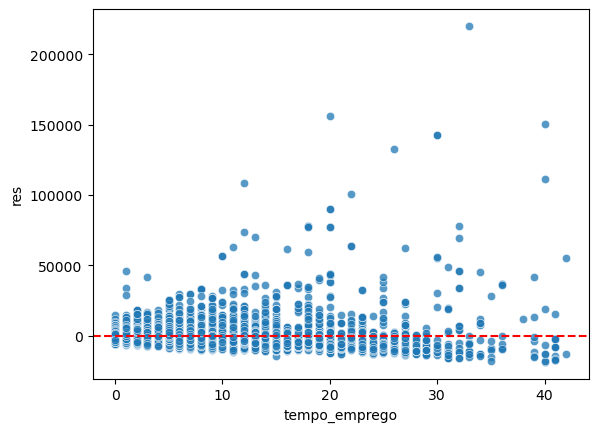

In [127]:
# análise de resíduos 

df_train['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_train, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [130]:
# definição dos df com as variáveis definidas pelo stepwise para base de teste

X_test = renda_dummies_test[variaveis]
y_test = renda_dummies_test['renda']

df_test = pd.concat([X, y], axis=1)
df_test.rename(columns={'educacao_Superior completo': 'educacao_Superior_completo'}, 
                 inplace=True)
df_test.head()

,tempo_emprego,sexo_M,idade,tipo_renda_Empresário,educacao_Superior_completo,renda
3740,4,0,47,0,1,11019
13261,13,0,33,0,0,3442
14972,2,0,40,0,0,3556
4190,2,0,40,1,0,4323
3962,12,1,44,0,0,10022


In [131]:
X_test = df_test.drop('renda', axis=1)

df_test['pred'] = reg.predict(X_test)  # valores preditos da regressão na base de teste

r = df_test[['pred', 'renda']].corr().iloc[0,1]    # calcular r2 por meio da correlação (r)
r2 = r ** 2
r2

0.29153071369392025

Comparando com a regularização em lasso e ridge, a seleção de variáveis com o modelo stepwise obteve o melhor coeficiente de determinação: 29%. 

5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

Os modelos de regularização em lasso e ridge apresentaram coeficiente de determinação muito próximos. Dos modelos testados, o stepwise foi o que apresentou maior R2 e foi o mais simples, com menos variáveis. 

6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [132]:
# transformar renda em log

reg_log = smf.ols('''np.log(renda) ~ tempo_emprego
                                        + sexo_M
                                        + idade
                                        + tipo_renda_Empresário
                                        + educacao_Superior_completo''',
             df_train).fit()

reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     995.4
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:00:00   Log-Likelihood:                -10241.
No. Observations:                9320   AIC:                         2.049e+04
Df Residuals:                    9314   BIC:                         2.054e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.2288      0.037    196.495      0.000       7.157       7.301
tempo_emprego                  0.0612      0.001     51.470      0.000       0.059       0.064
sexo_M                         0.7967      0.016     50.107      0.000       0.765       0.828
idade                          0.0055      0.001      6.452      0.000       0.004       0.007
tipo_renda_Empresário          0.1423      0.017      8.433      0.000       0.109       0.175
educacao_Superior_completo     0.1040      0.016      6.650      0.000       0.073       0.135
==============================================================================
Omnibus:                        0.239   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.210
Skew:                           0.006   Prob(JB):                        0.900
Kurtosis:                       3.020   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
df_test['pred_log'] = reg_log.predict(X_test)  # valores preditos da regressão na base de teste

r = df_test[['pred_log', 'renda']].corr().iloc[0,1]    # calcular r2 por meio da correlação (r)
r2 = r ** 2
r2

0.2919908372739758

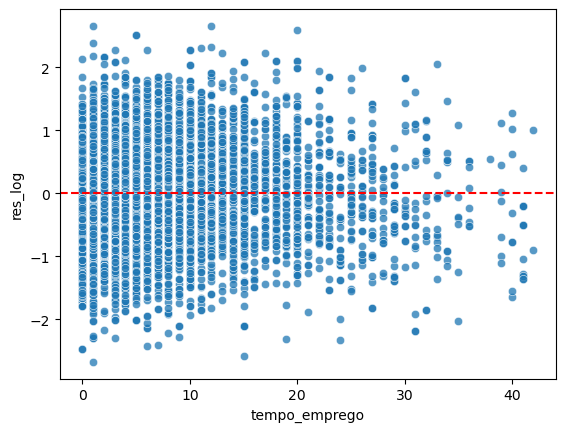

In [126]:
# análise de resíduos 

df_train['res_log'] = reg_log.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = df_train, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Transformar ``renda`` em log não fez muita diferença em relação ao coeficiente de determinação na base de teste, mas o gráfico de resíduos ficou melhor. 

7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [143]:
# definição das bases de treino e teste

X_train = df_train.drop('renda', axis=1)
X_test = df_test.drop(['renda', 'pred', 'pred_log'], axis=1)

y_train = df_train.renda
y_test = df_test.renda

In [149]:
# criar e treinar a árvore de regressão

reg_tree = DecisionTreeRegressor(random_state=100, max_depth=6)
reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, random_state=100)

In [150]:
# r2 na base de teste

reg_tree.score(X_test, y_test)

0.38200264579823495

De todos os métodos, a árvore de regressão apresentou o maior R2: 38%.